In [1]:
import sys
sys.path.append('../../Scripts')

# # for reading datafiles 
import pandas as pd
# import script that has many standard functions:
from PostProcessingScripts import * 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))

            
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']

MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_SFR, SFR in enumerate(SFRs):
	ind_x = ind_SFR+1
	for ind_GSMF, GSMF in enumerate(GSMFs):
		ind_y = ind_GSMF + 1
		for ind_MZ, MZ in enumerate(MZs):
			ind_z = ind_MZ +1

			MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
           
print('obtain index of the SFRD models that we want to highlight')
print('-----')
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']
for ind_SFRD, SFRD in enumerate(MSSFRnameslistCSV):
    if SFRD in ['.0.0.0', '.2.3.1', '.3.1.2']:
        print(ind_SFRD, SFRD, (MSSFRnameslist[ind_SFRD]))
        print()
        
MSSFRheaderDict =  {'000':'.0.0.0', '111':'.1.1.1', '112':'.1.1.2', '113':'.1.1.3', '121':'.1.2.1', '122':'.1.2.2', '123':'.1.2.3', '131':'.1.3.1', '132':'.1.3.2', '133':'.1.3.3', '211':'.2.1.1',\
                    '212':'.2.1.2', '213':'.2.1.3', '221':'.2.2.1', '222':'.2.2.2', '223':'.2.2.3', '231':'.2.3.1', '232':'.2.3.2', '233':'.2.3.3', '311':'.3.1.1', '312':'.3.1.2', '313':'.3.1.3', '321':'.3.2.1', \
                    '322':'.3.2.2', '323':'.3.2.3', '331':'.3.3.1', '332':'.3.3.2', '333':'.3.3.3'}    


obtain index of the SFRD models that we want to highlight
-----
0 .0.0.0 000

16 .2.3.1 231

20 .3.1.2 312



In [54]:
headerDict_intrinsic = {5:'All intrinsic (z=0) [Gpc^{-3} yr^{-1}]',  0:'channel V intrinsic (z=0) [Gpc^{-3} yr^{-1}]',  1:'channel I intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 2:'channel II intrinsic (z=0) [Gpc^{-3} yr^{-1}]',3:'channel III intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 4:'channel IV intrinsic (z=0) [Gpc^{-3} yr^{-1}]'}
headerDict_observed  = {5:'All observed (design LVK) [yr^{-1}]',  0:'channel V observed (design LVK) [yr^{-1}]', 1:'channel I observed (design LVK) [yr^{-1}]', 2:'channel II observed (design LVK) [yr^{-1}]', 3:'channel III observed (design LVK) [yr^{-1}]', 4:'channel IV observed (design LVK) [yr^{-1}]'}    



def plotFormationChannelRates(whichRate='intrinsic', CSVdir='name'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,14), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 5:'gray'}
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    
    List_formationchannelOptions = ['All', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    
    ind_formationchannelOptions = [0,1,2,3,4,5]
    
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    DCOname_dict = {'BHNS':'BHNS', 'BBH':'BHBH', 'BNS':'NSNS'}




    for ind_t, DCOtype in enumerate(Types):
        
        
        stringgg =  'formation_channels'
        csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + TypesLabels[ind_t] + 'fast.csv'     

        df_name = csvPath
        df = pd.read_csv(df_name, index_col=0).T
        
        axe = axes[ind_t]
        DCOname = DCOname_dict[DCOtype]

        for ind_c, whichChannel in enumerate(['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']):

            for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        

                key_mssfr = MSSFRheaderDict[MSSFRname]
                rates_L = df[key_mssfr]


                if whichRate =='intrinsic':
                    ind_wanted = dictFormationChannelIndex[whichChannel]*2
                    rates = rates_L[ind_wanted::12][0:nModels]
                    totalrates = rates_L[0::12][0:nModels]
    #                     print(rates)
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'\textbf{fraction} $\,\mathcal{R}_{\rm{m}}^{{0}}$'



                elif whichRate=='observed':
                    ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                    rates = rates_L[ind_wanted::12][0:nModels]

                    totalrates = rates_L[1::12][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                    ylabel = r'\textbf{fraction} $\, \mathcal{R}_{\rm{det}}$'



                if MSSFRname=='231':
#                     COLOR=TypeColours[ind_t]#'teal'
                    zorder=10
                    label=MSSFRnameslist[ind_L] 
                    ls = MSSFRlinestyles[1]
#                     print('label=', label)
                    ALPHA=1
                elif MSSFRname=='312':
                    zorder=10
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[2]
#                     print('label=', label)
                    ALPHA=1
                else:
                    zorder=2
                    label=None    
                    ls = MSSFRlinestyles[0]
                    ALPHA=0.1


                ratesRatio = np.asarray(rates)/np.asarray(totalrates)
                ind_color = dictFormationChannelIndex[whichChannel]
                axe.plot(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], lw=2, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
                axe.scatter(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], s=50, label=None, zorder=zorder+1, alpha=1, linestyle=ls) #c=BPScolors




        xmin = -0.8
        xmax = nModels +0.5 # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


        for ll in [0.25, 0.5, 0.75]:
            axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=1.5, zorder=0)
            axe.text(17.5-0.04, ll, str(ll) +r'$\,$' , rotation = 0, fontsize = fs-4, color = 'gray', va='bottom', ha = 'right')#, weight = 'bold')
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )



#       # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '

        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#             axe.set_yscale('log')


        # set physical labels on bottom
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            ind_label = dictFormationChannelIndex[whichChannel]-1
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.98, 0.97, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', va='top', ha = 'right',transform=axe.transAxes)#, weight = 'bold')



        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-4, rotation=30)#, orientation=30)    
     

    x__ = -100*np.ones(5)
    for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
        plt.plot(x__,x__ , lw=5, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
        
    lgd = f.legend(fontsize=fs-6, ncol=3,\
                         bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.09)#2)
#     plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./FormationChannelsCombined_' + whichRate  + '.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()

    return

nModels=20


In [71]:
headerDict_intrinsic = {5:'All intrinsic (z=0) [Gpc^{-3} yr^{-1}]',  0:'channel V intrinsic (z=0) [Gpc^{-3} yr^{-1}]',  1:'channel I intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 2:'channel II intrinsic (z=0) [Gpc^{-3} yr^{-1}]',3:'channel III intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 4:'channel IV intrinsic (z=0) [Gpc^{-3} yr^{-1}]'}
headerDict_observed  = {5:'All observed (design LVK) [yr^{-1}]',  0:'channel V observed (design LVK) [yr^{-1}]', 1:'channel I observed (design LVK) [yr^{-1}]', 2:'channel II observed (design LVK) [yr^{-1}]', 3:'channel III observed (design LVK) [yr^{-1}]', 4:'channel IV observed (design LVK) [yr^{-1}]'}    

NSNSrate0 = [13.0, 1900.0] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533 and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
BHBHrate0 = [16.0, 130.0] #for minimum and maximum of possible local merger rates estimates,  and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
BHNSrate0 = [7.4,  320.0] # min and max range from the two estimates based on GW200115 and GW200105

ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]




def plotFormationChannelFractions(whichRate='intrinsic', DCOtype='BBH'):
    
    """
    parameters
    
    """
    
    ncols=5
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26, 6), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
#     Types      = ['BBH', 'BHNS', 'BNS']
#     TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    # channel colors 
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 5:'gray'}
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    
    List_formationchannelOptions = ['All', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    
    ind_formationchannelOptions = [0,1,2,3,4,5]
    
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    DCOname_dict = {'BHNS':'BHNS', 'BBH':'BHBH', 'BNS':'NSNS'}
    DCOind_dict = {'BBH':0, 'BHNS':1, 'BNS':2}
    DCOname = DCOname_dict[DCOtype]

        
    stringgg =  'formation_channels'
    csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     

    df_name = csvPath
    df = pd.read_csv(df_name, index_col=0).T


    
    zorder=10
    for ind_c, whichChannel in enumerate(['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']):
        axe = axes[ind_c]
        ind_color = dictFormationChannelIndex[whichChannel]
        
        for ind_L, MSSFRname in enumerate(MSSFRnameslist):



            key_mssfr = MSSFRheaderDict[MSSFRname]
            rates_L = df[key_mssfr]

            if whichRate =='intrinsic':
                ind_wanted = dictFormationChannelIndex[whichChannel]*2
                rates = rates_L[ind_wanted::12][0:nModels]
                totalrates = rates_L[0::12][0:nModels]
#                     print(rates)
                if ind_L==0:
                    print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 
                ylabel = r'\textbf{Rate} $\,\mathcal{R}_{\rm{m}}^{{0}}$'



            elif whichRate=='observed':
                ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                rates = rates_L[ind_wanted::12][0:nModels]
                totalrates = rates_L[1::12][0:nModels]
                if ind_L==0:
                    print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                ylabel = r'\textbf{Rate} $\, \mathcal{R}_{\rm{det}}$'


            for ind_bps, BPSmodelName in enumerate(BPSnameslist):
                ratesRatio = (np.asarray(rates)/np.asarray(totalrates))[ind_bps]

                
#                 axe.plot(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], lw=2, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
                axe.scatter(ratesRatio, totalrates[ind_bps], c=channelColorDict[whichChannel], s=50, label=None, zorder=zorder+1, alpha=1, marker=dictMarkerShape[BPSmodelName]) #c=BPScolors




        xlabel = r'\textbf{Channel fraction}'

        
        
        xx = np.linspace(0,1,10)
        
        # if plotting intrinsic, add the local detected merger rates inferred from obesrvations. 
        if whichRate=='intrinsic':
            min_obs_rate = np.ones_like(xx)*ObservedRatesList[DCOind_dict[DCOtype]][0]
            max_obs_rate = np.ones_like(xx)*ObservedRatesList[DCOind_dict[DCOtype]][1]
#             if ind_t in [0, 1, 2]:
            axe.fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.7, color='lightgray', zorder=1)



        axe.set_xlim(0, 1)
        if ind_c==0:
            axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
        else:
            axe == layoutAxesNoYlabel(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#             axe.set_yticks([])
            axe.set_yticklabels( () )
#             axe.set_yscale('log')
        axe.set_yscale('log')
        axe.grid(True)


#         # set physical labels on bottom
#         if ind_t==2:
#             physicalnames = []
#             for ind_m, bps_model in enumerate(BPSnameslist):
#                 physicalnames.append(r'\textbf{%s}'%(bps_model) )
#             axe.set_xticks(range(nModels))
#             axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

#             axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
#             ind_label = dictFormationChannelIndex[whichChannel]-1
#         else:
#             axe.set_xticks([])
#             axe.set_xticklabels( () )
            
#         # add name of DCO type
#         axe.text(0.98, 0.97, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', va='top', ha = 'right',transform=axe.transAxes)#, weight = 'bold')



#         ##### SECOND AXIS ######
#         # add physical name labels on top
#         if ind_t==0:
#             physicalnames=[]
#             for ind_m, bps_model in enumerate(BPSnameslist):
#                 physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
#             ax2y = axe.twiny()
#             ax2y.set_xlim(xmin, xmax)

#             ax2y.set_xticks(range(nModels))
#             ax2y.set_xticklabels(physicalnames, fontsize=fs-4, rotation=30)#, orientation=30)    
     

#     x__ = -100*np.ones(5)
#     for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
#         plt.plot(x__,x__ , lw=5, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
        
#     lgd = f.legend(fontsize=fs-6, ncol=3,\
#                          bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.09)#2)
#     plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./FormationChannels_' + whichRate + '_' + DCOtype + '.png', dpi=100, transparent=False) #,\
#                 bbox_extra_artists=(lgd,),bbox_inches='tight', loc='upper center') 
    plt.show()
    plt.close()

    return








the intrinsic fiducial rate for  BBH = 10.264851714686774


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


the intrinsic fiducial rate for  BBH = 18.90719716772108
the intrinsic fiducial rate for  BBH = 2.2341711150681087
the intrinsic fiducial rate for  BBH = 0.3442761401186718
the intrinsic fiducial rate for  BBH = 1.770009078940906


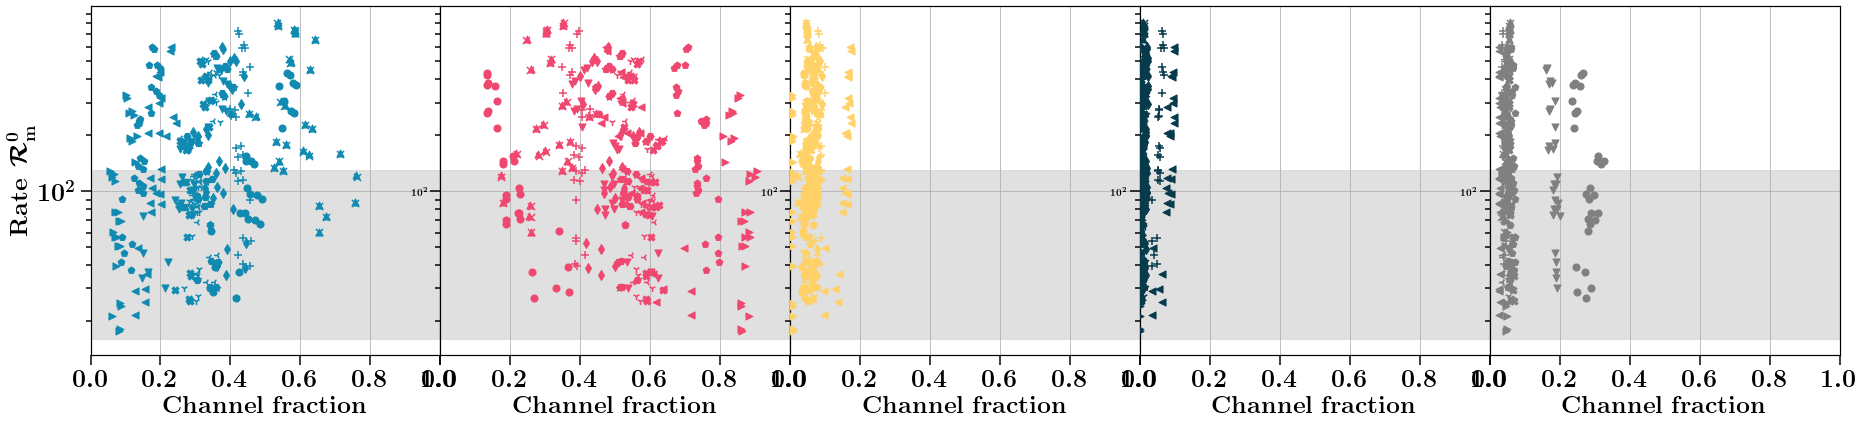

In [72]:

plotFormationChannelFractions(whichRate='intrinsic', DCOtype='BBH')




the intrinsic fiducial rate for  BHNS = 35.47937182808738


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


the intrinsic fiducial rate for  BHNS = 3.191658255170108
the intrinsic fiducial rate for  BHNS = 2.3264495281697952
the intrinsic fiducial rate for  BHNS = 0.2214191905750853
the intrinsic fiducial rate for  BHNS = 1.8038777110389992


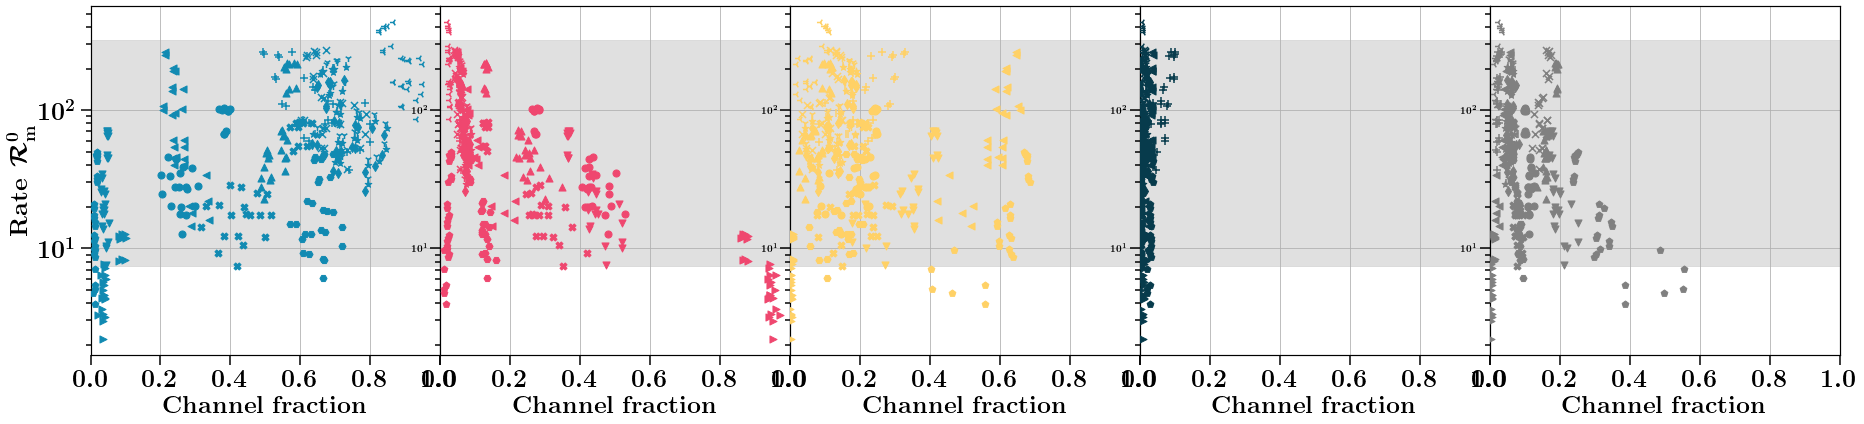

In [73]:

plotFormationChannelFractions(whichRate='intrinsic', DCOtype='BHNS')




the intrinsic fiducial rate for  BNS = 8.226833432993995


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


the intrinsic fiducial rate for  BNS = 0.0
the intrinsic fiducial rate for  BNS = 0.0034781483717232
the intrinsic fiducial rate for  BNS = 25.031649388886407
the intrinsic fiducial rate for  BNS = 0.125151687891149


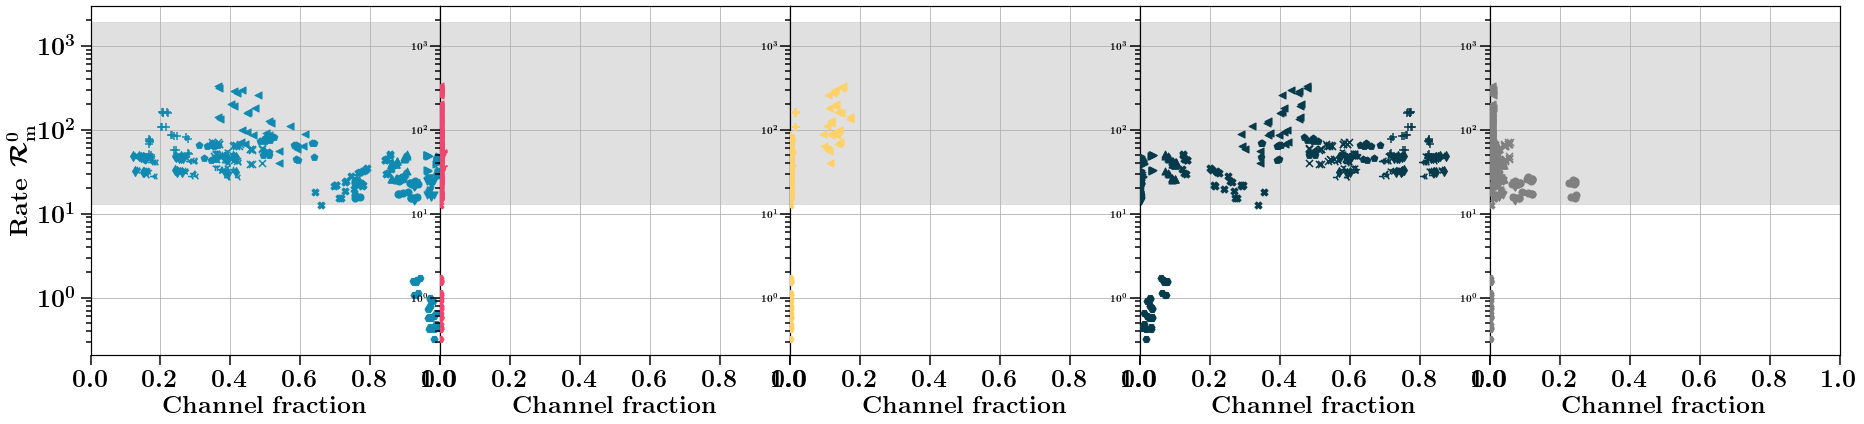

In [74]:

plotFormationChannelFractions(whichRate='intrinsic', DCOtype='BNS')




the observed fiducial rate for  BBH = 58.53267139023945


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


the observed fiducial rate for  BBH = 198.65282614030068
the observed fiducial rate for  BBH = 6.108615384306575
the observed fiducial rate for  BBH = 0.3327693693720939
the observed fiducial rate for  BBH = 15.249608598103135


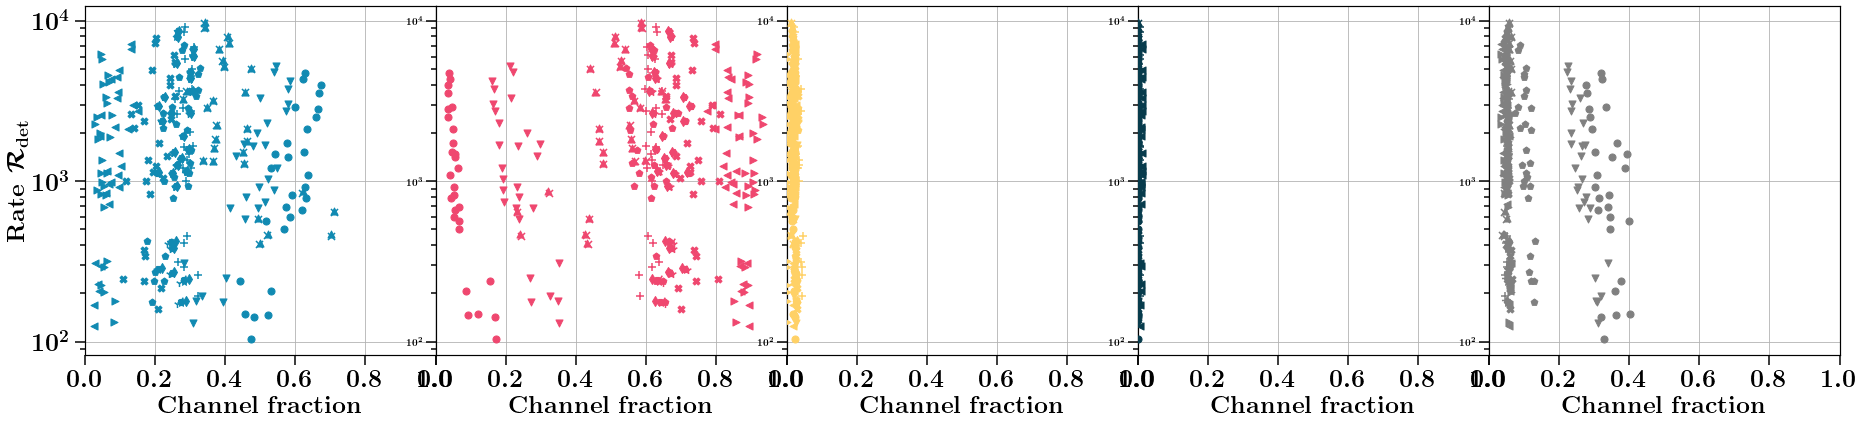

the observed fiducial rate for  BHNS = 9.262391707408261


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide


the observed fiducial rate for  BHNS = 0.4588423143858912
the observed fiducial rate for  BHNS = 0.4652898905617596
the observed fiducial rate for  BHNS = 0.03526468822924
the observed fiducial rate for  BHNS = 0.6058069253699636


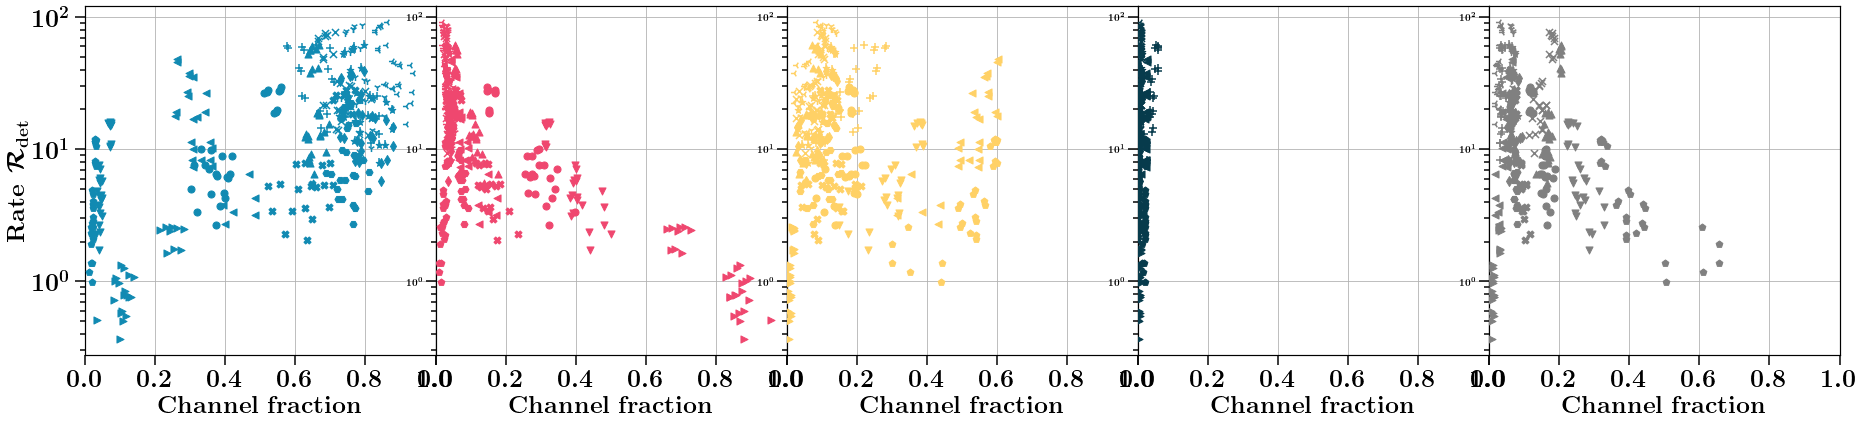

the observed fiducial rate for  BNS = 0.2186737882909167
the observed fiducial rate for  BNS = 0.0
the observed fiducial rate for  BNS = 8.3009978419845e-05
the observed fiducial rate for  BNS = 0.6479278397338294
the observed fiducial rate for  BNS = 0.0046216340498601


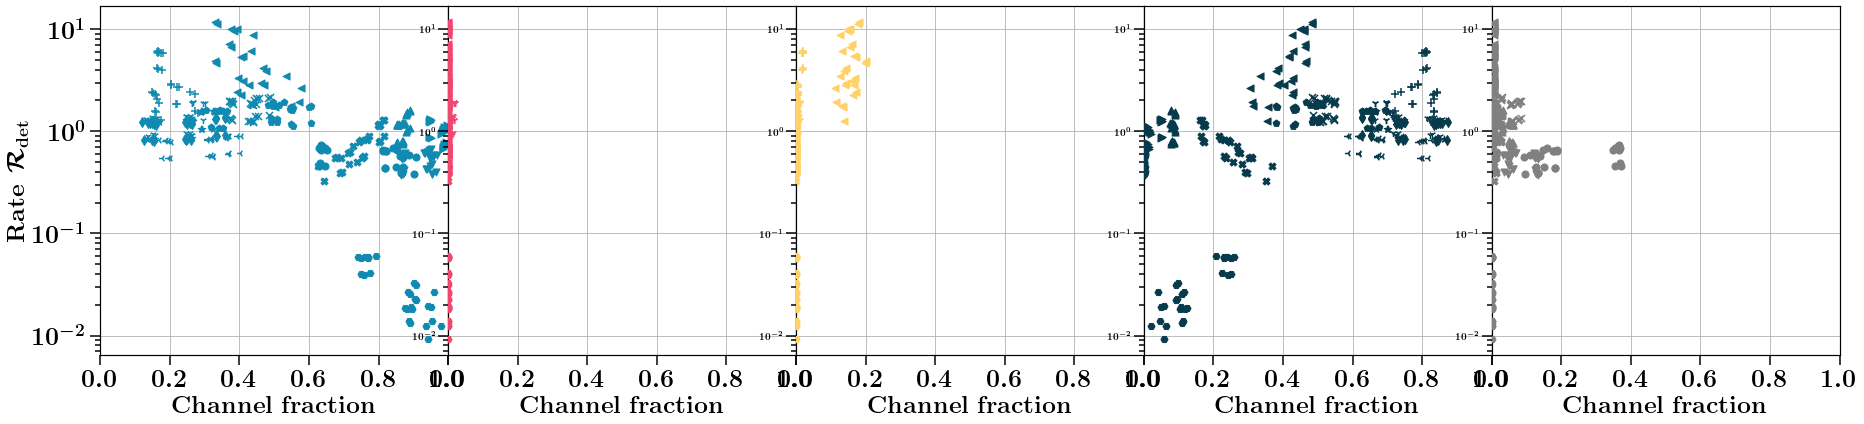

In [75]:

plotFormationChannelFractions(whichRate='observed', DCOtype='BBH')
plotFormationChannelFractions(whichRate='observed', DCOtype='BHNS')
plotFormationChannelFractions(whichRate='observed', DCOtype='BNS')






the observed fiducial rate for  BBH = 58.53267139023945
the observed fiducial rate for  BBH = 198.65282614030068
the observed fiducial rate for  BBH = 6.108615384306575
the observed fiducial rate for  BBH = 0.3327693693720939


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.f

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.f

the observed fiducial rate for  BBH = 15.249608598103135
the observed fiducial rate for  BHNS = 9.262391707408261
the observed fiducial rate for  BHNS = 0.4588423143858912


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.f

the observed fiducial rate for  BHNS = 0.4652898905617596
the observed fiducial rate for  BHNS = 0.03526468822924
the observed fiducial rate for  BHNS = 0.6058069253699636


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.f

the observed fiducial rate for  BNS = 0.2186737882909167
the observed fiducial rate for  BNS = 0.0
the observed fiducial rate for  BNS = 8.3009978419845e-05
the observed fiducial rate for  BNS = 0.6479278397338294


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.f

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.f

the observed fiducial rate for  BNS = 0.0046216340498601


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:177: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later


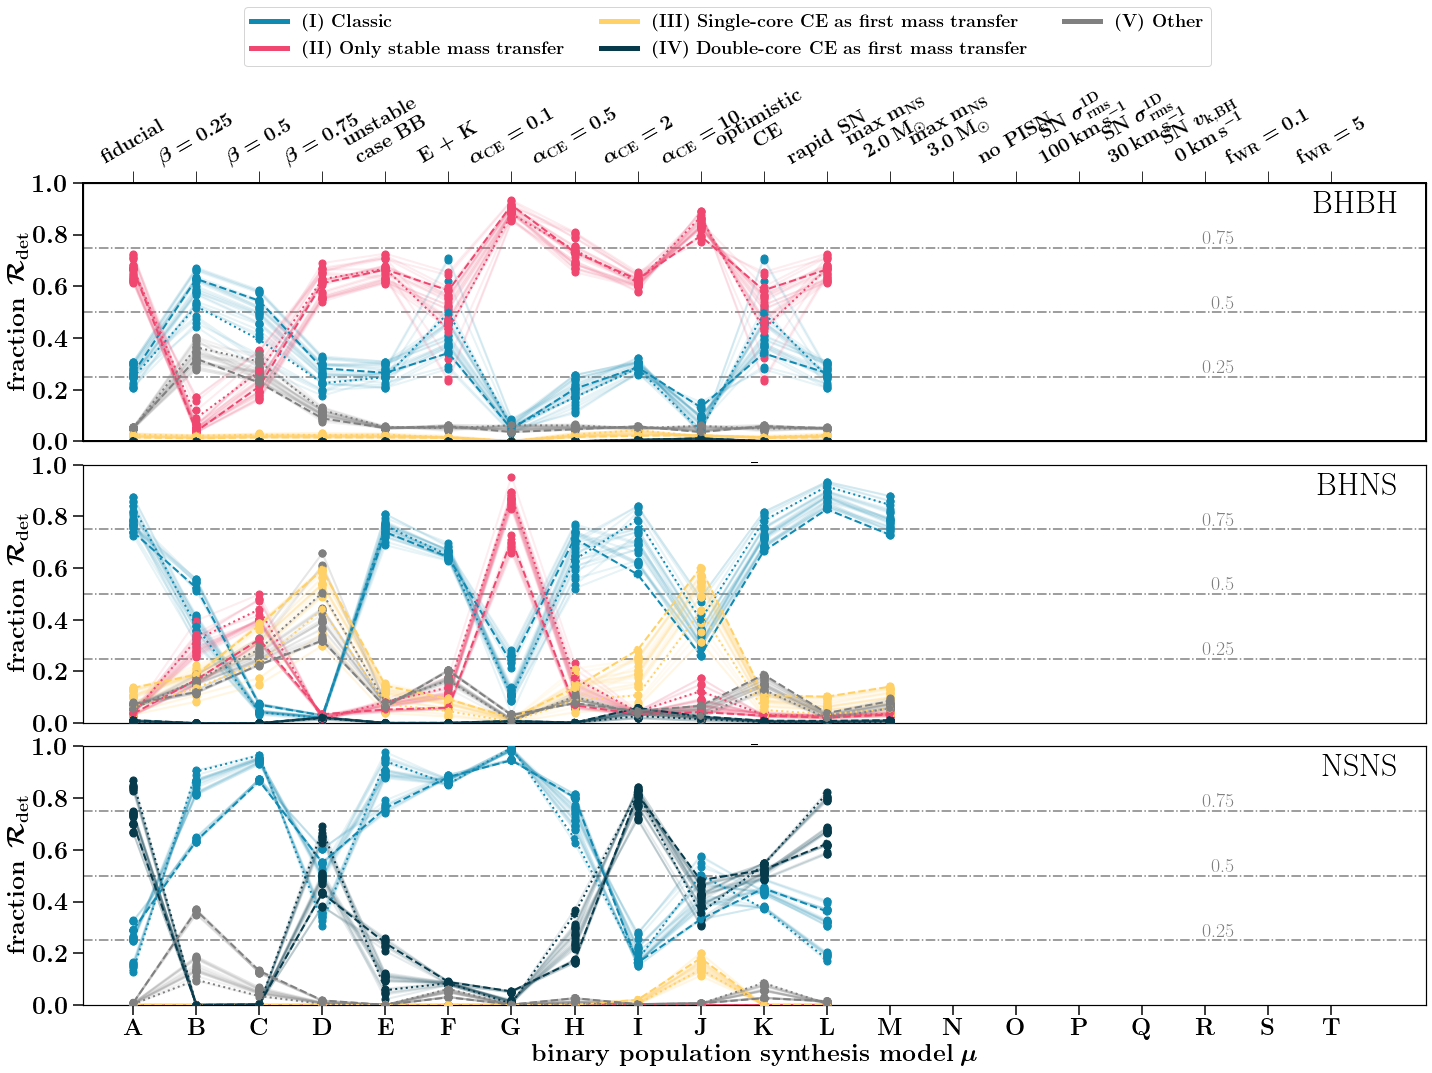

In [23]:


# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
ylims =[[0,1],[0,1],[0,1]]
plotFormationChannelRates(whichRate='observed', CSVdir=CSVdir)


the observed fiducial rate for  BBH = 58.53267139023945
the observed fiducial rate for  BBH = 198.65282614030068
the observed fiducial rate for  BBH = 6.108615384306575
the observed fiducial rate for  BBH = 0.3327693693720939
the observed fiducial rate for  BBH = 15.249608598103135


ValueError: The number of FixedLocator locations (17), usually from a call to set_ticks, does not match the number of ticklabels (20).

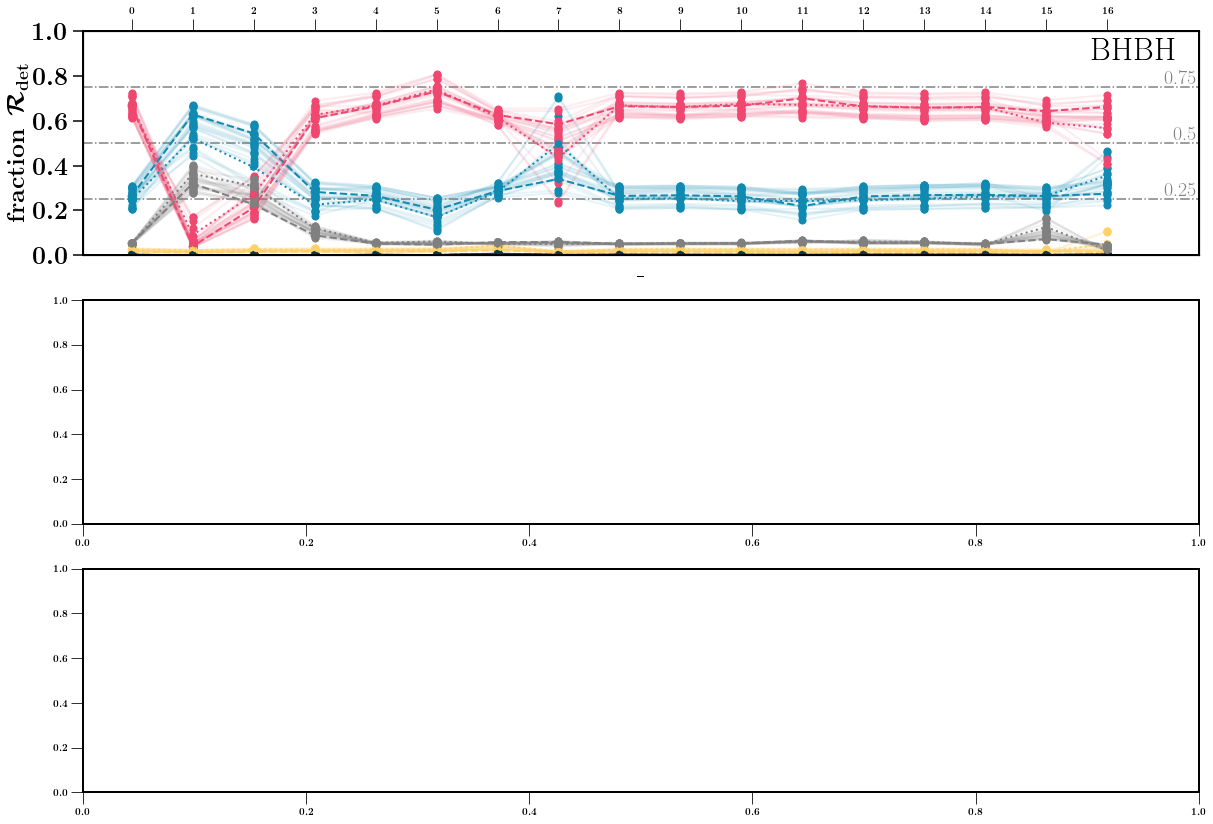

In [17]:


# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
ylims =[[0,1],[0,1],[0,1]]
plotFormationChannelRates(whichRate='observed', CSVdir=CSVdir)


In [ ]:


# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
ylims =[[0,1],[0,1],[0,1]]
plotFormationChannelRates(whichRate='observed', CSVdir=CSVdir)
